## <center>CS7150 - Deep Learing Home Work 1</center>

### Question 2. 
In this problem, you will train a classifier on the MNIST dataset. You can find this dataset
in TorchVision. Train a fully-connected neural network with 2 hidden layers and ReLU activations.

In [99]:
import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [100]:
# downloading MNSIT training and testing dataset

transform = transforms.Compose([transforms.ToTensor(),                    # ToTensor converts image to numbers
                              transforms.Normalize((0.1307,), (0.3081,)), # global mean and standard deviation of MNIST data set
                              ])                                          

batch_size = 64

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./root', 
                             train=True, 
                             download=True,
                             transform=transform),
    batch_size=batch_size, 
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./root', 
                             train=False, 
                             download=True,
                             transform = transform),
    batch_size=batch_size, 
    shuffle=True)


We use the root parameter to define where to save the data.

The train parameter is set to true because we are initializing the MNIST training dataset.

The download parameter is set to true because we want to download it if it’s not already present in our data folder.

The transform parameter is set to none because we don’t want to apply any image manipulation transforms at this time.  <br>

The values 0.1307 and 0.3081 used for the Normalize() transformation are the global mean and standard deviation of the MNIST dataset.   






In [101]:
# exploring the torch
ex = enumerate(train_loader)
batch_idx,(ex_data,ex_target) = next(ex)
print(ex_data.shape)

torch.Size([64, 1, 28, 28])


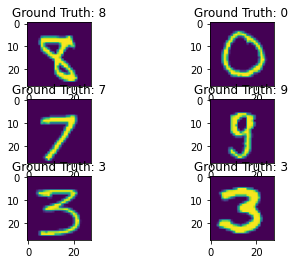

In [102]:
# printing samples from MNIST data set
fig = plt.figure()
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(ex_data[i][0],interpolation = None)
    plt.title("Ground Truth: {}".format(ex_target[i]))
#fig


In [103]:
# printing the sizes of data loader and dataset
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


This means that in one batch we have 64 samples of greyscale( as second element is 1),28x28 pixels.

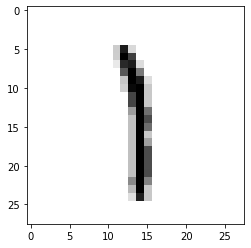

In [104]:
# printing in greyscale
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

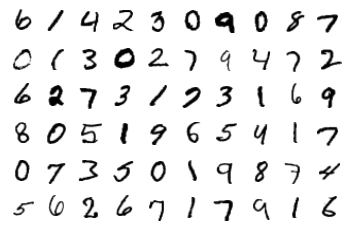

In [105]:
# another way of plotting sample images
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [106]:
# constructing the neural network class

class Net(nn.Module):                   # inherits of the base class nn.Module.
    def __init__(self):                 # class initialization
        super(Net,self).__init__()      # super creates an instance of the base nn.Module class
        self.fc1 = nn.Linear(28*28,20) # 28*28 is the number of neurons in layer1 and 20 is the numbers of neurons in next layer
        self.fc2 = nn.Linear(20,25)
        self.fc3 = nn.Linear(25,10)
        self.dropout = nn.Dropout(0.15)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=25, bias=True)
  (fc3): Linear(in_features=25, out_features=10, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
)


As we flattent he image before sending to the input of neural network, so the input size is 28*28 = 784

#### Negative log-likelihood loss. 
It is useful to train a classification problem with C classes. Together the LogSoftmax() and NLLLoss() acts as the cross-entropy loss
        

In [107]:
%%time
# training the neural network 
learning_rate = 0.001
optimizer = optim.SGD(net.parameters(),lr= learning_rate,momentum = 0.9)
criterion = nn.NLLLoss()

epochs = 35

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
epoch_counter = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    for images, labels in train_loader:              # Looping over for training data
        
        images = images.view(images.shape[0], -1)    # Flatten MNIST images into a 784 long vector
        optimizer.zero_grad()                        # Training pass
        output = net(images)
        loss = criterion(output, labels)     
        loss.backward()                              # This is where the model learns by backpropagating
        optimizer.step()                             # And optimizes its weights here
        
    epoch_counter.append(e)
    
    with torch.no_grad():
        for images, labels in train_loader:                           # Looping over for training data
            images = images.view(images.shape[0], -1)
            output = net(images)
            loss = criterion(output, labels)
            running_loss+=loss.item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(labels.data.view_as(pred)).sum()
        train_loss.append(running_loss/len(train_loader))              # Capturing the training loss for plotting
        train_accuracy.append(100.0*correct/len(train_loader.dataset)) # Capturing the training accuracy for plotting
        
        running_loss = 0
        correct = 0
        for images, labels in test_loader:
            images = images.view(images.shape[0], -1)
            output = net(images)
            loss = criterion(output, labels)
            running_loss+=loss.item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(labels.data.view_as(pred)).sum()
        test_loss.append(running_loss/len(test_loader))                # Capturing the testing loss for plotting
        test_accuracy.append(100.0*correct/len(test_loader.dataset))   # Capturing the testing accuracy for plotting
    print("Epoch {} \n Training loss: {:.4f}, Training Accuracy: {:.2f}, \n Testing loss: {:.4f}, Testing Accuracy: {:.2f}\n".format
          (e, train_loss[e], train_accuracy[e], test_loss[e], test_accuracy[e]))
    if (e+1)%15==0:
        learning_rate*=0.5

Epoch 0 
 Training loss: 0.5828, Training Accuracy: 82.12, 
 Testing loss: 0.5737, Testing Accuracy: 82.49

Epoch 1 
 Training loss: 0.4368, Training Accuracy: 86.82, 
 Testing loss: 0.4286, Testing Accuracy: 87.32

Epoch 2 
 Training loss: 0.3788, Training Accuracy: 88.58, 
 Testing loss: 0.3729, Testing Accuracy: 88.87

Epoch 3 
 Training loss: 0.3409, Training Accuracy: 89.82, 
 Testing loss: 0.3403, Testing Accuracy: 89.61

Epoch 4 
 Training loss: 0.3163, Training Accuracy: 90.65, 
 Testing loss: 0.3181, Testing Accuracy: 90.72

Epoch 5 
 Training loss: 0.2947, Training Accuracy: 91.26, 
 Testing loss: 0.2983, Testing Accuracy: 90.73

Epoch 6 
 Training loss: 0.2783, Training Accuracy: 91.70, 
 Testing loss: 0.2858, Testing Accuracy: 91.54

Epoch 7 
 Training loss: 0.2687, Training Accuracy: 92.08, 
 Testing loss: 0.2692, Testing Accuracy: 91.93

Epoch 8 
 Training loss: 0.2538, Training Accuracy: 92.48, 
 Testing loss: 0.2576, Testing Accuracy: 92.10

Epoch 9 
 Training loss: 0.2

We achieved an accuracy of 95.64 on training set and 94.97 on testing set. This shows the model in not overfitting.

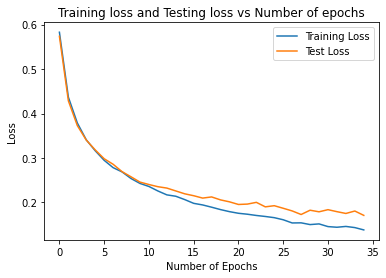

In [108]:
# plotting the training and testing losses over iteration
plt.plot(epoch_counter, train_loss, label = "Training Loss")
plt.plot(epoch_counter, test_loss, label = "Test Loss")


plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training loss and Testing loss vs Number of epochs')
plt.legend()
plt.show()

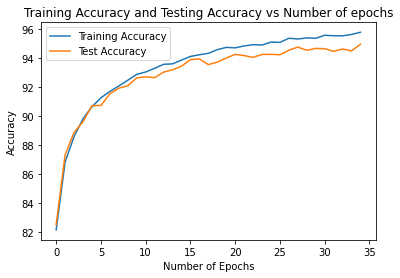

In [109]:
# plotting the training and testing accuracies over iterationa
plt.plot(epoch_counter, train_accuracy, label = "Training Accuracy")
plt.plot(epoch_counter, test_accuracy, label = "Test Accuracy")


plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy and Testing Accuracy vs Number of epochs')
plt.legend()
plt.show()

### Question 3. 
Download an AlexNet and a ResNet101 model that have been trained on ImageNet. You
can find these models in TorchVision. Using a camera, take a picture of an object that belongs to one of the
ImageNet classes. Use both models to classify the image. Output the top 5 predicted classes and their
corresponding probabilities, according to each model. Were the models correct?

In [122]:
import torchvision.models as models
resnet = models.resnet101(pretrained=True)
resnet.eval()                                 # Model description
alexnet = models.alexnet(pretrained = True)
alexnet.eval()                                # Model description

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [123]:
# importing the imagenet_classes.txt
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]
print("Number of classes: {}".format(len(classes)))
#classes

Number of classes: 1000


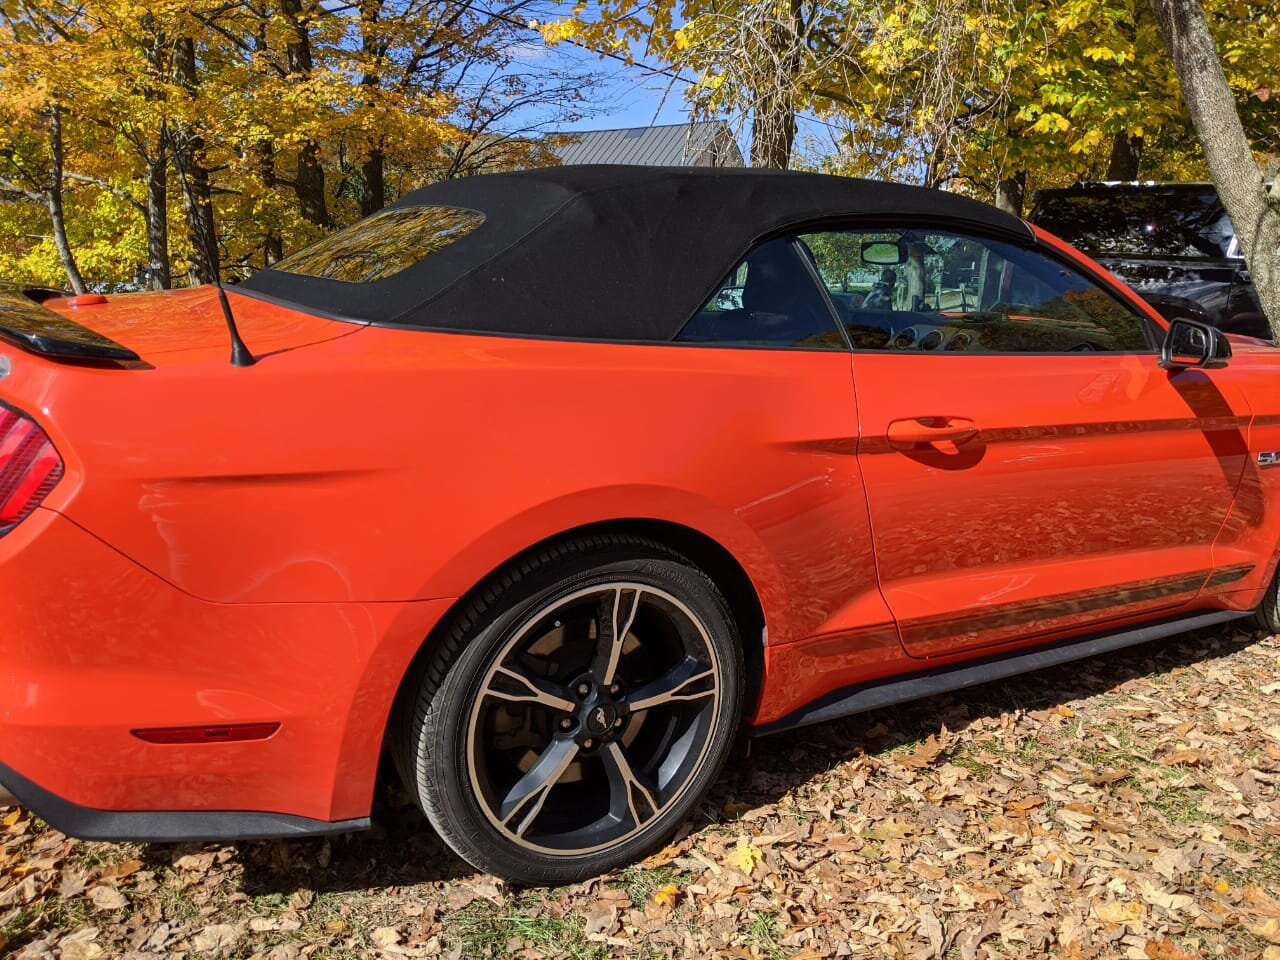

In [150]:
# Import Pillow
from PIL import Image
img = Image.open("car.jpg")
#img.show()
img

In [151]:
# defining the transformations to be done before feeding the model

transform = transforms.Compose([            # Defining a variable transform
 transforms.Resize(256),                    # Resize the image to 256×256 pixels.
 transforms.CenterCrop(224),                # Crop the image to 224×224 pixels about the center
 transforms.ToTensor(),                     # Convert the image to PyTorch Tensor data type.
 transforms.Normalize(                      # Normalize the image by setting ues.
 mean=[0.485, 0.456, 0.406],                # its mean and
 std=[0.229, 0.224, 0.225]                  # standard deviation to the specified values as suggested by Pytorch
 )])
image_transformed = transform(img)          # transforming the image
input_batch = torch.unsqueeze(image_transformed, 0)         # preparing batch to be fed into the model

In [216]:
# getting alexnet probabilites
out = alexnet(input_batch)
print(out.shape)
_, indices = torch.sort(out, descending=True)
probabilities = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], probabilities[idx].item()) for idx in indices[0][:5]]

torch.Size([1, 1000])


[('817, sports_car', 43.360023498535156),
 ('511, convertible', 37.40570831298828),
 ('479, car_wheel', 11.249046325683594),
 ('436, beach_wagon', 2.769408941268921),
 ('717, pickup', 1.817090630531311)]

Text(0, 0.5, 'Probability')

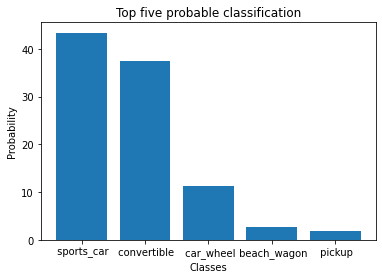

In [217]:
p,i = torch.topk(probabilities,5)
p = p.tolist()
i = i.tolist()
names = []
[names.append(classes[val].split(',')[1]) for val in i]
plt.bar(names,p)
plt.title('Top five probable classification')
plt.xlabel('Classes')
plt.ylabel('Probability')

In [218]:
# getting resnet probabilites
out = resnet(input_batch)
print(out.shape)
_, indices = torch.sort(out, descending=True)
probabilities = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], probabilities[idx].item()) for idx in indices[0][:5]]


torch.Size([1, 1000])


[('511, convertible', 82.17086029052734),
 ('479, car_wheel', 10.774330139160156),
 ('817, sports_car', 5.336316108703613),
 ('436, beach_wagon', 0.5651971101760864),
 ('581, grille', 0.3885020613670349)]

We see both the models classified correctly, it is a car and it is convertible !

Text(0, 0.5, 'Probability')

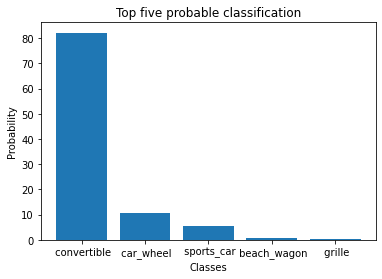

In [219]:
p,i = torch.topk(probabilities,5)
p = p.tolist()
i = i.tolist()
names = []
[names.append(classes[val].split(',')[1]) for val in i]
plt.bar(names,p)
plt.title('Top five probable classification')
plt.xlabel('Classes')
plt.ylabel('Probability')

### We see that both the models have predictions are correct to the fact that it is a sports car and it is converible too! Maybe a combination of both will be better, a convertible sports car!